In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.2 Setting the scene

In [4]:
def mse(ws, m, X, Y):
    N = len(X)
    err = 0
    for i in range(N):
        xi = X[i, :]
        yi = m(ws, xi)
        err += (Y[i] - yi) ** 2
    err /= N
    return err

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0]).T[:,np.newaxis]

print("X =\n", X)
print("Y =\n", Y)

X =
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Y =
 [[0]
 [1]
 [1]
 [0]]


## 1.3 Model 1: linear, one layer, no activation function

In [6]:
def m1(ws, x):
    return ws[0] * x[0] + ws[1] * x[1] + ws[2]

def mse1(ws):
    return mse(ws, m1, X, Y)

In [12]:
in_units = 2
out_units = 1
limit = np.sqrt(6 / (in_units + out_units))
ws0 = np.array([[np.random.uniform(-limit, limit)], [np.random.uniform(-limit, limit)], [0]])

print("ws0 = ", ws0)

ws0 =  [[1.14676071]
 [0.48362663]
 [0.        ]]


In [13]:
mse1(ws0)

array([0.73658576])

In [14]:
gradients1 = {}
gradients1[0] = lambda ws, x: x[0]
gradients1[1] = lambda ws, x: x[1]
gradients1[2] = lambda ws, x: 1

In [15]:
def grad_mse(ws, m, grads, X, Y):
    N = len(X)
    M = len(ws)
    grad_ws = np.zeros((M,1))
    for i in range(N):
        xi = X[i, :]
        yi = Y[i]
        tmp = yi - m(ws, xi)
        for j in range(M):
            grad_ws[j] = grad_ws[j] + tmp * grads[j](ws, xi)
    grad_ws = -2 / N * grad_ws
    return grad_ws

In [16]:
def grad_desc_mse(K, ws, learning_eps, loss, grad_loss, verbose=False):
    history = [loss(ws)]
    for k in range(K):
        grad_ws = grad_loss(ws)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        if verbose:
            print(f"Iteration {k}: ws = {ws}")
        history.append(loss(ws))
    return ws, history

In [17]:
def grad_loss(ws):
    return (grad_mse(ws, m1, gradients1, X, Y))
#grad_loss = lambda ws: grad_mse(ws, m1, gradients1, X, Y)
K = 50
learning_eps = 0.5
ws, history = grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss, verbose=False)

In [18]:
ws

array([[1.28378320e-04],
       [1.28002772e-04],
       [4.99847948e-01]])

In [19]:
history

[array([0.73658576]),
 array([0.51449273]),
 array([0.40765932]),
 array([0.35042361]),
 array([0.31674174]),
 array([0.29550147]),
 array([0.28148791]),
 array([0.2719838]),
 array([0.2654314]),
 array([0.26086931]),
 array([0.25767357]),
 array([0.25542616]),
 array([0.25384145]),
 array([0.25272194]),
 array([0.25192997]),
 array([0.25136914]),
 array([0.25097168]),
 array([0.25068981]),
 array([0.25048983]),
 array([0.2503479]),
 array([0.25024713]),
 array([0.25017557]),
 array([0.25012474]),
 array([0.25008864]),
 array([0.25006299]),
 array([0.25004476]),
 array([0.25003181]),
 array([0.25002261]),
 array([0.25001607]),
 array([0.25001142]),
 array([0.25000812]),
 array([0.25000577]),
 array([0.2500041]),
 array([0.25000291]),
 array([0.25000207]),
 array([0.25000147]),
 array([0.25000105]),
 array([0.25000074]),
 array([0.25000053]),
 array([0.25000038]),
 array([0.25000027]),
 array([0.25000019]),
 array([0.25000013]),
 array([0.2500001]),
 array([0.25000007]),
 array([0.25000

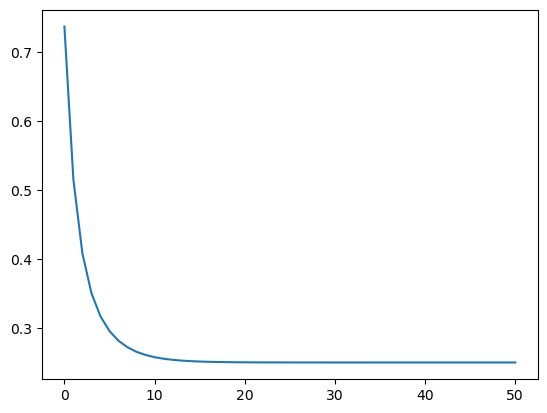

In [20]:
plt.plot(range(len(history)), history)

In [21]:
def my_xor1(x1, x2):
    return (np.round(ws[0] * x1 + ws[1]*x2 + ws[2]))
#my_xor1 = lambda x1, x2: np.round(ws[0] * x1 + ws[1]*x2 + ws[2])
for i in range(4):
    print(f"my_xor1({X[i, 0]},{X[i, 1]})={my_xor1(X[i, 0], X[i, 1])}")

my_xor1(0,0)=[0.]
my_xor1(0,1)=[0.]
my_xor1(1,0)=[0.]
my_xor1(1,1)=[1.]


In [22]:
def accuracy(X, Y, f):
    correct = 0
    for i in range(len(X)):
        y = f(X[i, 0], X[i, 1])
        if y == Y[i]:
            correct += 1
        else:
            print(f"f({X[i, 0]},{X[i, 1]})={y}, but should be {Y[i]}")
    a = correct / len(X)
    return a

In [23]:
a = accuracy(X, Y, my_xor1)
print("\na = ",a)

f(0,1)=[0.], but should be [1]
f(1,0)=[0.], but should be [1]
f(1,1)=[1.], but should be [0]

a =  0.25


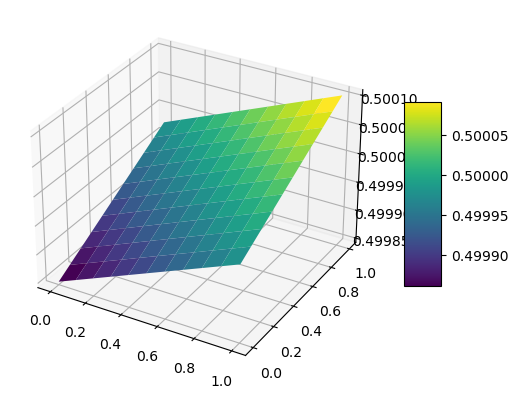

In [24]:
def f(x1, x2):
    return (ws[0] *x1 + ws[1]*x2 + ws[2])
#f = lambda x1, x2: ws[0] *x1 + ws[1]*x2 + ws[2]
A, B = np.meshgrid(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
Z = f(A, B)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

## 1.4 Model 2: linear, one layer, sigmoid activation function

In [27]:
def s(x):
    return 1.0 / (1.0 + np.exp(-x))

def m2(ws, x):
    return s(m1(ws, x))

def mse2(ws):
    return mse(ws, m2, X, Y)

In [28]:
mse2(ws0)

array([0.28821289])

In [29]:
gradients2 = {}
gradients2[0] = lambda ws, x: s(m1(ws, x)) * s(1 - m1(ws, x)) * gradients1[0](ws, x)
gradients2[1] = lambda ws, x: s(m1(ws, x)) * s(1 - m1(ws, x)) * gradients1[1](ws, x)
gradients2[2] = lambda ws, x: s(m1(ws, x)) * s(1 - m1(ws, x)) * gradients1[2](ws, x)

In [30]:
grad_loss = lambda ws: grad_mse(ws, m2, gradients2, X, Y)
K = 50
learning_eps = 2
ws, history = grad_desc_mse(K, ws0, learning_eps, mse2, grad_loss, verbose=False)

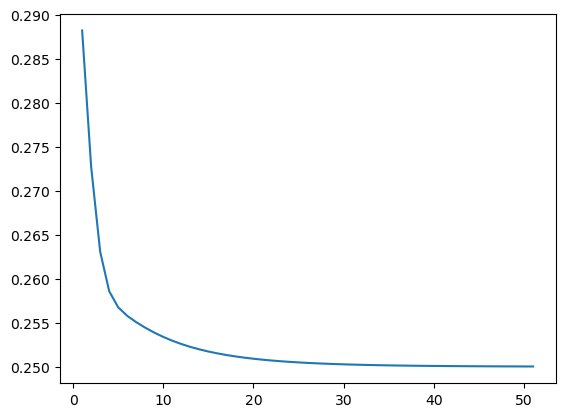

In [31]:
plt.plot(range(1, len(history) + 1), history)

In [32]:
def my_xor2(x1, x2):
    return (np.round(s(ws[0] * x1 + ws[1] * x2 + ws[2])))

#my_xor2 = lambda x1, x2: np.round(s(ws[0] * x1 + ws[1] * x2 + ws[2]))
for i in range(4):
    print(f"my_xor2({X[i, 0]},{X[i, 1]})={my_xor2(X[i, 0], X[i, 1])}")
a = accuracy(X, Y, my_xor2)
print(f'Accuracy: {a}')

my_xor2(0,0)=[0.]
my_xor2(0,1)=[0.]
my_xor2(1,0)=[1.]
my_xor2(1,1)=[1.]
f(0,1)=[0.], but should be [1]
f(1,1)=[1.], but should be [0]
Accuracy: 0.5


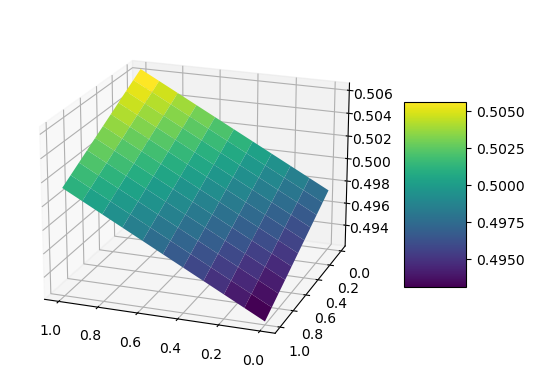

In [34]:
def f(x1,x2):
    return (s(ws[0] * x1 + ws[1] * x2 + ws[2]))
#f = lambda x1, x2: s(ws[0] * x1 + ws[1] * x2 + ws[2])
A, B = np.meshgrid(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
Z = f(A, B)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=3)

ax.view_init(elev=20, azim=-250)

## 1.5 Model 3: one hidden layer with linear and one output layer with sigmoid activation

In [35]:
def hidden_layer(ws, x, n):
    y = np.zeros(n)
    for i in range(n):
        i1 = i * 3
        i2 = i * 3 + 1
        i3 = i * 3 + 2
        y[i] = ws[i1] * x[0] + ws[i2] * x[1] + ws[i3]  # as m1 before
    return y

In [36]:
n = 32
def mo(ws, x):
    return (np.dot(hidden_layer(ws, x, n), ws[n*3:n*3+n]) + ws[n*3+n])
#mo = lambda ws, x: np.dot(hidden_layer(ws, x, n), ws[n*3:n*3+n]) + ws[n*3+n]

def m3(ws, x):
    return (s(mo(ws, x)))
#m3 = lambda ws, x: s(mo(ws, x))
def mse3(ws):
    return (mse(ws, m3, X, Y))
#mse3 = lambda ws: mse(ws, m3, X, Y)

In [37]:
ws0 = np.zeros(n*3+n+1)
in_units = 2
out_units = 1
limit = np.sqrt(6 / (in_units + out_units))
for i in range(n):
    i1 = i * 3
    i2 = i * 3 + 1
    i3 = i * 3 + 2
    ws0[i1] = np.random.uniform() * 2 * limit - limit
    ws0[i2] = np.random.uniform() * 2 * limit - limit
    ws0[i3] = 0
    
in_units = n
out_units = 1
limit = np.sqrt(6 / (in_units + out_units))

for i in range(n*3, n*3+n):
    ws0[i] = np.random.uniform(-limit, limit)

for i in ws0:
    print(i)

1.2818526205772904
0.6556638529872199
0.0
1.2503253264623335
-0.30767011212527406
0.0
0.38494148498301395
0.7070843235564304
0.0
-0.8000142266353842
-0.25871328011517636
0.0
1.4029186506543414
-0.4319174342485592
0.0
-1.3712311548059155
1.2131184991169495
0.0
1.222437796635327
-1.0901331628918332
0.0
-0.7009319336836395
1.1933916708343657
0.0
1.4026191640446328
-0.807855619367138
0.0
-0.7971619424905888
0.03954280289445844
0.0
-0.07701774709759057
-1.1580869065947057
0.0
0.630146178249632
1.3528435388631463
0.0
-0.27138902654513397
-0.40950503375487135
0.0
0.06187177497437224
-0.14123220782081725
0.0
-0.7930341735047294
-0.6672076275792197
0.0
0.3871180381106678
-0.4470006122547566
0.0
-0.006857452694496002
0.7934666229977558
0.0
-0.35310855911703554
0.1475695853900707
0.0
0.7413539501086392
1.0441544234140483
0.0
-0.156578944718905
-0.9987619874386302
0.0
-1.1345374339765664
-0.5495254996830117
0.0
0.5959492966626379
0.1972809245171967
0.0
-0.2548251508147865
0.5861244485402313
0.0
-0

In [38]:
mse3(ws0)

array([0.31481961])

In [41]:
# Parameters (weights and bias) hidden layer
gradients3 = {}
model1 = {}

for k in range(k):
    i1 = 3 * k 
    i2 = 3 * k + 1
    i3 = 3 * k + 2
    gradients3[i1] = lambda ws, x, k=k: s(mo(ws, x)) * s(1 - mo(ws, x)) * x[0] * ws[3 * n + k - 1]
    gradients3[i2] = lambda ws, x, k=k: s(mo(ws, x)) * s(1 - mo(ws, x)) * x[1] * ws[3 * n + k - 1]
    gradients3[i3] = lambda ws, x, k=k: s(mo(ws, x)) * s(1 - mo(ws, x)) * ws[3 * n + k - 1]
    model1[k] = lambda ws, x, i1=i1, i2=i2, i3=i3: ws[i1] * x[0] + ws[i2] * x[1] + ws[i3]

# Weights output layer
for i in range(3 * n, 3 * n + n):
    gradients3[i] = lambda ws, x, k=k: s(mo(ws, x)) * s(1 - mo(ws, x)) * model1[k](ws, x)
    k += 1

# Bias output layer
gradients3[3 * n + n] = lambda ws, x: s(mo(ws, x)) * s(1 - mo(ws, x))

In [44]:
def grad_loss(ws):
    return (grad_mse(ws, m3, gradients3, X, Y))
#grad_loss = lambda ws: grad_mse(ws, m3, gradients3, X, Y)
K = 50
learning_eps = 0.5

ws, history = grad_desc_mse(K, ws0, learning_eps, mse3, grad_loss, verbose=False)

plt.plot(range(1, len(history) + 1), history)

IndexError: index 189 is out of bounds for axis 0 with size 129

In [45]:
my_xor3 = lambda x1, x2: round(m3(ws, [x1, x2]))
for i in range(4):
    print(f"my_xor3({X[i, 0]},{X[i, 1]})={my_xor3(X[i, 0], X[i, 1])}")

a = accuracy(X, Y, my_xor3)
print(f'Accuracy: {a}')
f = lambda x1, x2: m3(ws, [x1, x2])
A, B = np.meshgrid(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
Z = np.array([f(a, b) for a, b in zip(np.ravel(A), np.ravel(B))]).reshape(A.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


IndexError: index 3 is out of bounds for axis 0 with size 3

## 1.6 Model 4: one hidden layer with relu and one output layer with sigmoid activation

In [49]:
#hidden_layer_4 = lambda ws, x, n: np.maximum(0, hidden_layer(ws, x, n))
def hidden_layer_4(ws,x,n):
    return (np.maximum(0, hidden_layer(ws, x, n)))
def mo4(ws, x):
    return np.dot(hidden_layer_4(ws, x, n), ws[n*3:n*3+n]) + ws[n*3+n]

def m4(ws, x):
    return s(mo4(ws, x))

def mse4(ws):
    return mse(ws, m4, X, Y)

In [50]:
mse4(ws0)

array([0.30541906])

In [51]:
def ite(cond, tc, fc):
    if cond:
        return tc
    else:
        return fc

In [52]:
gradients4 = {}
model1 = {}

for k in range(1, n+1):
    i1 = 3 * (k - 1)
    i2 = 3 * (k - 1) + 1
    i3 = 3 * (k - 1) + 2
    model1[k] = lambda ws, x, i1=i1, i2=i2, i3=i3: max(0, ws[i1] * x[0] + ws[i2] * x[1] + ws[i3])
    gradients4[i1] = lambda ws, x, k=k: s(mo4(ws, x)) * s(1 - mo4(ws, x)) * ite(model1[k](ws, x) <= 0, 0, x[0]) * ws[3 * n + k - 1]
    gradients4[i2] = lambda ws, x, k=k: s(mo4(ws, x)) * s(1 - mo4(ws, x)) * ite(model1[k](ws, x) <= 0, 0, x[1]) * ws[3 * n + k - 1]
    gradients4[i3] = lambda ws, x, k=k: s(mo4(ws, x)) * s(1 - mo4(ws, x)) * ite(model1[k](ws, x) <= 0, 0, 1) * ws[3 * n + k - 1]

k = 1
for i in range(3 * n, 3 * n + n):
    gradients4[i] = lambda ws, x, k=k: s(mo4(ws, x)) * s(1 - mo4(ws, x)) * max(0, model1[k](ws, x))
    k += 1

gradients4[3 * n + n] = lambda ws, x: s(mo4(ws, x)) * s(1 - mo4(ws, x))

In [53]:
grad_loss = lambda ws: grad_mse(ws, m4, gradients4, X, Y)
K = 500
learning_eps = 1.5
ws, history = grad_desc_mse(K, ws0, learning_eps, mse4, grad_loss, verbose=False)

plt.plot(range(1, len(history) + 1), history)

ValueError: setting an array element with a sequence.

In [57]:
def my_xor4(x1,x2):
    return (round(m4(ws, [x1,x2])))
#my_xor4 = lambda x1, x2 = round(m4(ws, [x1,x2]))
for i in range(4):
    print(f"my_xor4({X[i, 0]},{X[i, 1]})={my_xor4(X[i, 0], X[i, 1])}")

a = accuracy(X, Y, my_xor4)
print(f'Accuracy: {a}')

def f(x1,x2):
    return (m4(ws, [x1, x2]))

A, B = np.meshgrid(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
Z = np.array([f(a, b) for a, b in zip(np.ravel(A), np.ravel(B))]).reshape(A.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


IndexError: index 3 is out of bounds for axis 0 with size 3

In [61]:
# Define the arrays
w11 = np.array([0.41652033, 0.7749157, 0.83778775, 0.64122725, 0.3972386, -0.13516521, -0.60432655, -0.20290181, 
                -0.7232665, -0.35317, -0.8889785, -0.2863993, 0.54030126, 0.37175888, -0.82367843, -0.33497408, 
                -0.8567182, 0.5161414, -0.25462216, 0.59564906, 0.80922335, 0.00252599, 0.3720131, -0.1701207, 
                0.34805146, -0.38333094, -0.17244412, 0.7132528, -0.14648864, -0.17876345]).reshape(-1, 1)
w11 = np.vstack([w11, np.array([[-0.6636416], [-0.39717668]])])

w12 = np.array([0.41662493, -0.7749062, -0.8376726, -0.64101034, 0.40976927, -0.09223783, 0.60428804, -0.09886253, 
                0.7417394, -0.08979583, 1.1194593, 0.13293397, 0.5400226, 0.37171456, 0.8246372, -0.43565178, 
                0.85677105, 0.51622313, -0.41895077, -0.5953253, -0.8091849, -0.3766787, 0.28819063, -0.38122708, 
                0.34833792, 0.15245543, -0.25060123, -0.7132655, -0.30406952, -0.3443008]).reshape(-1, 1)
w12 = np.vstack([w12, np.array([[0.66343206], [-0.03848529]])])

b1 = np.array([-4.16518986e-01, -4.11640503e-05, -1.45169579e-05, -3.96516771e-06, -1.09622735e-04, 0.00000000e+00, 
               2.90098578e-05, 0.00000000e+00, -1.63983065e-03, 0.00000000e+00, -6.36966957e-04, -1.47912502e-01, 
               -5.39916575e-01, -3.71752203e-01, -5.50682598e-04, 1.15736163e+00, -6.27825721e-05, -5.16140461e-01, 
               0.00000000e+00, -1.62737619e-04, -8.02413124e-05, -2.25486048e-02, 1.79730232e-05, 0.00000000e+00, 
               -3.48306417e-01, -1.66664287e-01, 0.00000000e+00, -3.03934885e-05, 0.00000000e+00, 0.00000000e+00, 
               6.44910688e-05, 0.00000000e+00]).reshape(-1, 1)

ws1 = np.hstack([w11, w12, b1])
ws1 = ws1.flatten().reshape(-1, 1)

print(ws1)

[[ 4.16520330e-01]
 [ 4.16624930e-01]
 [-4.16518986e-01]
 [ 7.74915700e-01]
 [-7.74906200e-01]
 [-4.11640503e-05]
 [ 8.37787750e-01]
 [-8.37672600e-01]
 [-1.45169579e-05]
 [ 6.41227250e-01]
 [-6.41010340e-01]
 [-3.96516771e-06]
 [ 3.97238600e-01]
 [ 4.09769270e-01]
 [-1.09622735e-04]
 [-1.35165210e-01]
 [-9.22378300e-02]
 [ 0.00000000e+00]
 [-6.04326550e-01]
 [ 6.04288040e-01]
 [ 2.90098578e-05]
 [-2.02901810e-01]
 [-9.88625300e-02]
 [ 0.00000000e+00]
 [-7.23266500e-01]
 [ 7.41739400e-01]
 [-1.63983065e-03]
 [-3.53170000e-01]
 [-8.97958300e-02]
 [ 0.00000000e+00]
 [-8.88978500e-01]
 [ 1.11945930e+00]
 [-6.36966957e-04]
 [-2.86399300e-01]
 [ 1.32933970e-01]
 [-1.47912502e-01]
 [ 5.40301260e-01]
 [ 5.40022600e-01]
 [-5.39916575e-01]
 [ 3.71758880e-01]
 [ 3.71714560e-01]
 [-3.71752203e-01]
 [-8.23678430e-01]
 [ 8.24637200e-01]
 [-5.50682598e-04]
 [-3.34974080e-01]
 [-4.35651780e-01]
 [ 1.15736163e+00]
 [-8.56718200e-01]
 [ 8.56771050e-01]
 [-6.27825721e-05]
 [ 5.16141400e-01]
 [ 5.1622313

In [62]:
ws2 = np.array([
    -0.8178053, 1.0259871, 0.7672013, 0.9983522, 0.3300904, 0.1318875, 0.9221373, 0.20387506,
    1.0057546, 0.2067241, 0.7479725, -0.25578788, -0.83140665, -0.952559, 0.946334, -1.0112743,
    0.5946371, -1.0230583, -0.04098088, 0.9588608, 0.7448052, -0.10435582, 0.25728533, 0.30141222,
    -0.8235109, -0.21171094, -0.28320622, 1.0405817, 0.40911728, 0.37331975, 0.87603277, 0.19098908,
    -0.8885394
]).reshape(-1, 1)


ws = np.vstack([ws1, ws2])

print(ws)

[[ 4.16520330e-01]
 [ 4.16624930e-01]
 [-4.16518986e-01]
 [ 7.74915700e-01]
 [-7.74906200e-01]
 [-4.11640503e-05]
 [ 8.37787750e-01]
 [-8.37672600e-01]
 [-1.45169579e-05]
 [ 6.41227250e-01]
 [-6.41010340e-01]
 [-3.96516771e-06]
 [ 3.97238600e-01]
 [ 4.09769270e-01]
 [-1.09622735e-04]
 [-1.35165210e-01]
 [-9.22378300e-02]
 [ 0.00000000e+00]
 [-6.04326550e-01]
 [ 6.04288040e-01]
 [ 2.90098578e-05]
 [-2.02901810e-01]
 [-9.88625300e-02]
 [ 0.00000000e+00]
 [-7.23266500e-01]
 [ 7.41739400e-01]
 [-1.63983065e-03]
 [-3.53170000e-01]
 [-8.97958300e-02]
 [ 0.00000000e+00]
 [-8.88978500e-01]
 [ 1.11945930e+00]
 [-6.36966957e-04]
 [-2.86399300e-01]
 [ 1.32933970e-01]
 [-1.47912502e-01]
 [ 5.40301260e-01]
 [ 5.40022600e-01]
 [-5.39916575e-01]
 [ 3.71758880e-01]
 [ 3.71714560e-01]
 [-3.71752203e-01]
 [-8.23678430e-01]
 [ 8.24637200e-01]
 [-5.50682598e-04]
 [-3.34974080e-01]
 [-4.35651780e-01]
 [ 1.15736163e+00]
 [-8.56718200e-01]
 [ 8.56771050e-01]
 [-6.27825721e-05]
 [ 5.16141400e-01]
 [ 5.1622313

my_xor5(0,0)=[0.]
my_xor5(0,1)=[1.]
my_xor5(1,0)=[1.]
my_xor5(1,1)=[0.]
Accuracy: 1.0


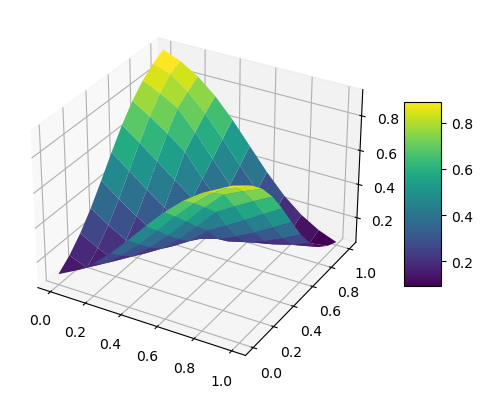

In [65]:
def my_xor5(x1,x2):
    return (np.round(m4(ws, [x1, x2])))

for i in range(4):
    print(f"my_xor5({X[i, 0]},{X[i, 1]})={my_xor5(X[i, 0], X[i, 1])}")

a = accuracy(X, Y, my_xor5)
print(f'Accuracy: {a}')

def f(x1,x2):
    return (m4(ws, [x1, x2]))

A, B = np.meshgrid(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
Z = np.array([f(a, b) for a, b in zip(np.ravel(A), np.ravel(B))]).reshape(A.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap='viridis')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)